<a href="https://colab.research.google.com/github/ashishpatel26/Ganpat-University-Data-Science/blob/main/Lecture_8_Clustering_Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
%matplotlib inline

### 2.Importing the mall dataset with pandas

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ashishpatel26/Ganpat-University-Data-Science/main/data/Mall_Customers.csv')

In [4]:
X = dataset.iloc[:,[3,4]].values

### 3.Using the elbow method to find the optimal number of clusters

The K-means algorithm aims to **choose centroids that minimise the inertia**, or **within-cluster sum-of-squares criterion**:

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

* **Inertia** makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

* **Inertia** is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “**curse of dimensionality**”). Running a dimensionality reduction algorithm such as **Principal component analysis (PCA)** prior to **k-means clustering** can alleviate this problem and speed up the computations.

In [7]:
from sklearn.cluster import KMeans

In [10]:
wcss =[]
for i in tqdm(range(1,11)):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### 4.Plot the graph to visualize the Elbow Method to find the optimal number of cluster  

* In cluster analysis, the **elbow metho**d is a **heuristic** used in determining the ***number of clusters in a data set***. 
* The method consists of plotting the **explained variation** as a function of the **number of clusters**, and *picking the elbow of the curve as the number of clusters to use*. 
* The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.

* The method can be traced to speculation by **Robert L. Thorndike in 1953**.
* There are various measures of **"explained variation"** used in the **elbow method**. 
* Most commonly, variation is quantified by variance, and the ratio used is the ratio of between-group variance to the total variance. 
* Alternatively, one uses the ratio of between-group variance to within-group variance, which is the **one-way ANOVA F-test statistic.**

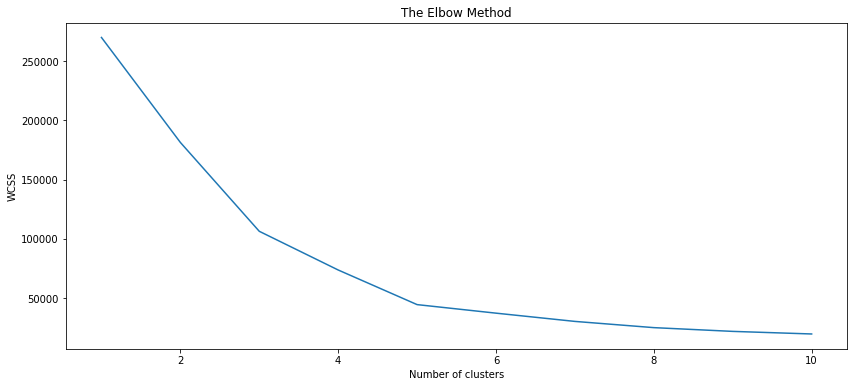

In [13]:
plt.figure(figsize=(14,6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 5.Applying KMeans to the dataset with the optimal number of cluster

In [19]:
kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)

### 6.Visualising the clusters

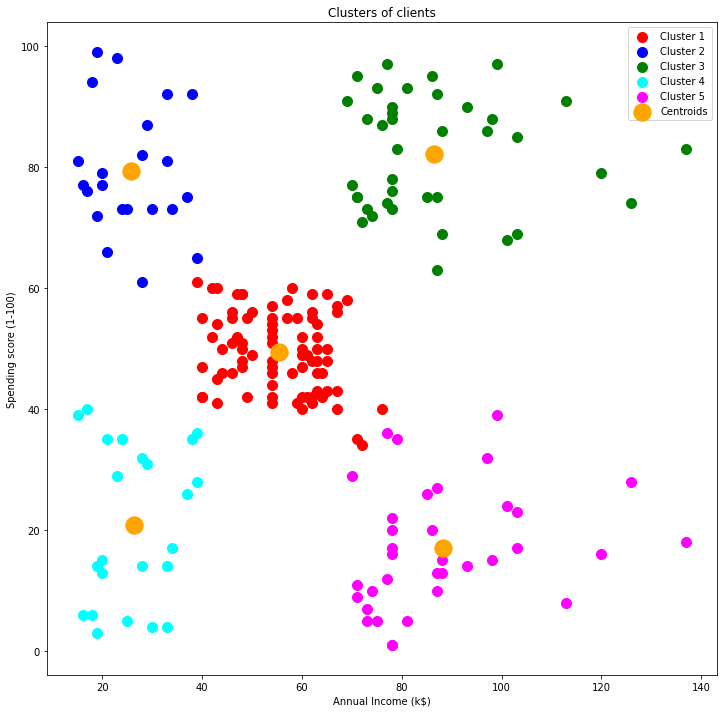

In [22]:
plt.figure(figsize=(12,12))

plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')

plt.scatter(X[Y_Kmeans == 4, 0], X[Y_Kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'orange', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()